# Лабораторная работа №2

## Импорт библиотек

In [3]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
from matplotlib import pyplot as plt

import tensorflow as tf
import plotly.graph_objects as go

In [4]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


# Объявление функций

In [5]:
def PLOT34(y_test, y_pred):
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.scatter(y_test, y_pred, alpha=0.1)
    plt.scatter(y_test, y_test, alpha=0.1)
    plt.title('Диаграмма рассеяния вычисленных значений');
    plt.xlabel('Проверочное Y')
    plt.ylabel('Вычисленное Y')

    plt.subplot(122)
    plt.scatter(y_test, (y_test - y_pred) ** 2, alpha=0.1)
    plt.title('Диаграмма рассеяния квадрата абсолютной ошибки')
    plt.xlabel('Проверочное Y')
    plt.ylabel('Квадрат абсолютной ошибки')


def GET_METRICS_SINGLE(y_test, y_pred):
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)

    print("MAE : {:>9,.3f} (средняя абсолютная ошибка)".format(mae))
    print("MSE : {:>9,.6f} (среднеквадратичная ошибка)".format(mse))
    print("RMSE: {:>9,.6f} (кв. корень из среднеквадратичной ошибки)".format(rmse))
    print("R2  : {:>9,.3f} (коэфф. детерминации)".format(r2))


def my3dplot(x_train, y_train, isDrawTrain, x_test, y_test, isDrawTest, y_pred, isDrawPred, x1Name, x2Name,
             y_targetName):
    sTransparencyVal = 0.9
    mTransparencyVal = 0.3
    mSize = 5

    trace_LinModel = go.Mesh3d(
        x=x_test[x1Name].values,
        y=x_test[x2Name].values,
        z=y_pred.reshape(-1),
        name="Вычисленный",
        opacity=sTransparencyVal,
        color='rgba(100,244,100,0.6)',
    )

    trace_Train = go.Scatter3d(x=x_train[x1Name].values,
                               y=x_train[x2Name].values,
                               z=y_train[y_targetName].values,
                               name="Обучающие",
                               mode='markers',
                               marker=dict(
                                   size=mSize,
                                   color=y_train[y_targetName].values,
                                   colorscale='Blues',
                                   opacity=mTransparencyVal
                               ))

    trace_Test = go.Scatter3d(x=x_test[x1Name].values,
                              y=x_test[x2Name].values,
                              z=y_test[y_targetName].values,
                              name="Проверочные",
                              mode='markers',
                              marker=dict(
                                  size=mSize,
                                  color=y_test[y_targetName].values,
                                  colorscale='Reds',
                                  opacity=mTransparencyVal
                              ))

    ListForDraw = []
    if isDrawTrain: ListForDraw.append(trace_Train)
    if isDrawTest:  ListForDraw.append(trace_Test)
    if isDrawPred:  ListForDraw.append(trace_LinModel)

    fig = go.Figure(data=ListForDraw)

    fig.update_layout(
        title='Завиcимость {} от ({}, {})'.format(y_targetName, x1Name, x2Name),
        scene=dict(
            xaxis_title=x1Name,
            yaxis_title=x2Name,
            zaxis_title=y_targetName,
        ),
    )
    fig.show()

# Загрузка данных

In [6]:
df = pd.read_csv('../datasets/abalone/abalone_PREPARED.csv',  # путь к файлу, (используй автодотолнение)
                 sep=',',  # разделитель данных в файле

                 header=0,
                 )

df[:2]  # отобразить первые строки таблицы df

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_is_F,sex_is_I,sex_is_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15.0,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7.0,0,0,1


## Выбор целевой переменной и независимых признаков

In [7]:
features = ['shell_weight', 'diameter', 'sex_is_M', 'viscera_weight']
target = ['rings']
dfX = df[features]
dfY = df[target]

In [8]:
scalerNormX = MinMaxScaler()
scalerNormX.fit(dfX)

dfXNorm = pd.DataFrame(
    data=scalerNormX.transform(dfX),
    columns=dfX.columns,
    index=dfX.index
)
scalerNormY = MinMaxScaler()
scalerNormY.fit(dfY)

dfYNorm = pd.DataFrame(
    data=scalerNormY.transform(dfY),
    columns=dfY.columns,
    index=dfY.index
)

### Проверка

In [9]:
dfXNorm.describe().loc[["min", "max"]]

,shell_weight,diameter,sex_is_M,viscera_weight
min,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0


In [10]:
dfYNorm.describe().loc[["min", "max"]]

,rings
min,0.0
max,1.0


Text(0.5, 1.0, 'rings_Norm')

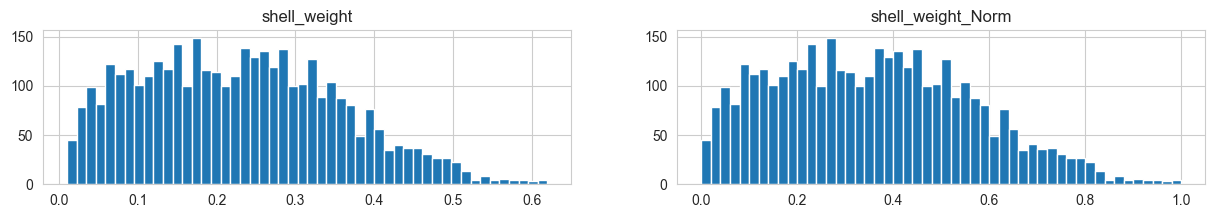

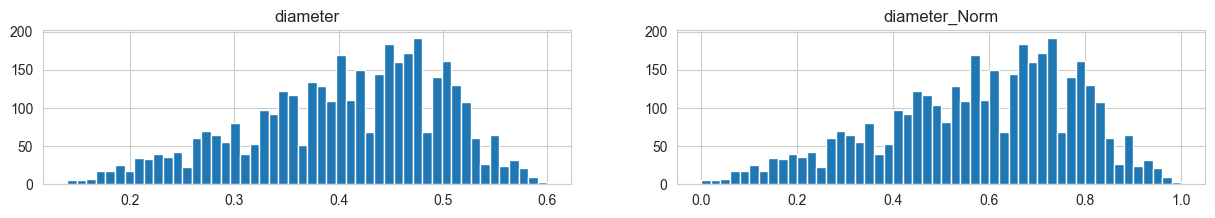

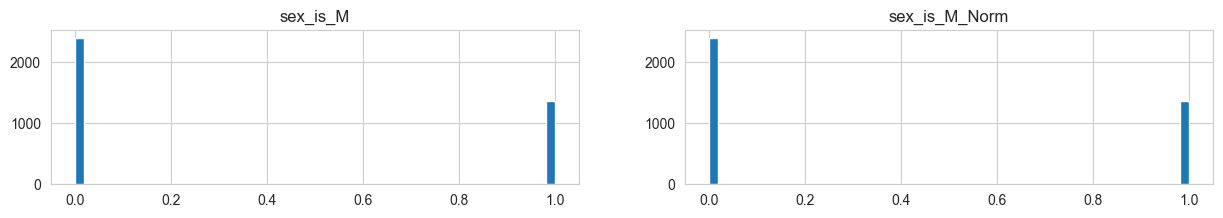

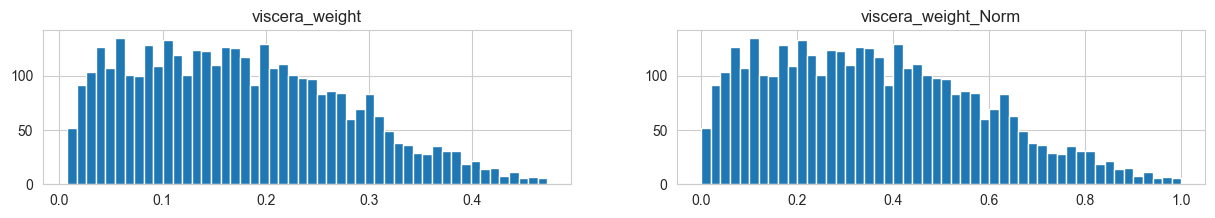

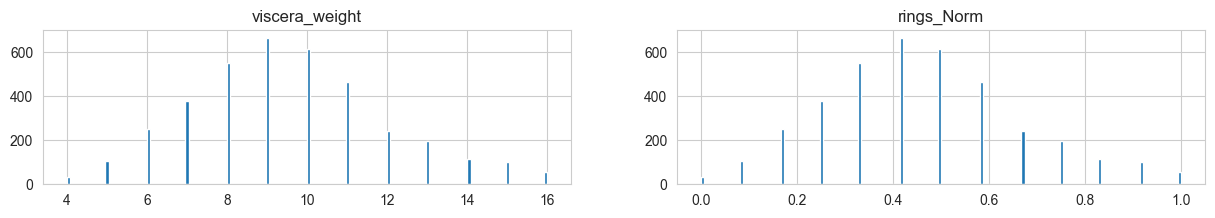

In [11]:
for i, colName in enumerate(dfXNorm.columns):
    plt.figure(figsize=(15, 2))

    plt.subplot(1, 2, 1)
    plt.hist(df[colName], bins=50)
    plt.title(colName)

    plt.subplot(1, 2, 2)
    plt.hist(dfXNorm[colName], bins=50)
    plt.title(colName + "_Norm")

plt.figure(figsize=(15, 2))

plt.subplot(1, 2, 1)
plt.hist(dfY["rings"], bins=150)
plt.title(colName)

plt.subplot(1, 2, 2)
plt.hist(dfYNorm["rings"], bins=150)
plt.title("rings_Norm")

# Формирование тренировочной и проверочной выборок

In [12]:
valid_size = 0.3
rand_seed = 8

xNorm_train, xNorm_test, yNorm_train, yNorm_test = train_test_split(
    dfXNorm[features],  # исходные данные X
    dfYNorm[target],  # исходные данные y

    test_size=valid_size,  # доля тестовой части в выборке
    random_state=rand_seed,  # начальное состояние генератора случ. чисел
    shuffle=True  # перемешивание
)

### Нейронная сеть m1. Построение модели без скрытых слоев от ДВУХ "x" (2->1)

### Для примера возьмем shell_weight и diameter

### Структура и параметры

In [68]:
with tf.device('/CPU:0'):
    totalHistoryLossTrain = []  # Вспомогательный список для хранение полной истории обучения
    totalHistoryLossTest = []  # Вспомогательный список для хранение полной истории обучения

    ###########################################
    #▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
    # 1) Параметры структуры
    input_size = 2  # кол-во входных  узлов
    output_size = 1  # кол-во выходных узлов
    ###hiddenLayer_size  = 10 # кол-во узлов на скрытом слое

    # 2.1) Построение модели нейронной сети
    # Многослойная
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Input(shape=(input_size,)))  # Входной слой
    # параметр "units" - кол-во узлов/нейронов на данном слое
    # параметр "activation" - вид функции активации
    #...

    model.add(tf.keras.layers.Dense(units=output_size,
                                    activation=tf.keras.activations.linear))  # Выходной слой, с линейной функцией активации

    # 2.2) Ф. потерь и оптимизации
    fLoss = tf.keras.losses.mean_squared_error
    #fOptimizer=tf.keras.optimizers.SGD(learning_rate=0.01)
    fOptimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.01)
    fMetric = [tf.keras.losses.mean_squared_error]

    model.compile(
        loss=fLoss,
        optimizer=fOptimizer,
        metrics=[fMetric]
    )

    print(model.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [69]:
xNorm_train[["shell_weight", "diameter"]].head()

,shell_weight,diameter
2965,0.300000,0.576087
3157,0.508197,0.782609
2447,0.177869,0.423913
726,0.509016,0.728261
1164,0.427049,0.641304


In [70]:
epochForTrain = 200  # количество эпох обучения

In [71]:
with tf.device('/CPU:0'):
    # 3) Цикл обучения/продолжения обучения сети
    # xNorm_train, xNorm_test, yNorm_train, yNorm_test
    history = model.fit(

        xNorm_train[["shell_weight", "diameter"]],
        # обучающие X  # требуется передать таблицу с кол-ом столбцов равным кол-ву входных нейронов
        yNorm_train,  # обучающие Y

        validation_data=(  # опционально: проверочные X и Y
            xNorm_test[["shell_weight", "diameter"]],
            # требуется передать таблицу с кол-ом столбцов равным кол-ву входных нейронов
            yNorm_test),

        epochs=epochForTrain,  # кол-во эпох обучения
        batch_size=100,  # кол-во образцов в каждой эпохе
        verbose=1,
    )

    totalHistoryLossTrain.extend(history.history['loss'])
    if 'val_loss' in history.history.keys():
        totalHistoryLossTest.extend(history.history['val_loss'])

Epoch 1/200
27/27 [==============================] - 0s 2ms/step - loss: 0.0608 - mean_squared_error: 0.0608 - val_loss: 0.0399 - val_mean_squared_error: 0.0399
Epoch 2/200
27/27 [==============================] - 0s 1ms/step - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.0347 - val_mean_squared_error: 0.0347
Epoch 3/200
27/27 [==============================] - 0s 962us/step - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.0322 - val_mean_squared_error: 0.0322
Epoch 4/200
27/27 [==============================] - 0s 917us/step - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 5/200
27/27 [==============================] - 0s 913us/step - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 6/200
27/27 [==============================] - 0s 892us/step - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 7/200
27/27 [=======

Text(0.5, 0, 'Эпохи обучения')

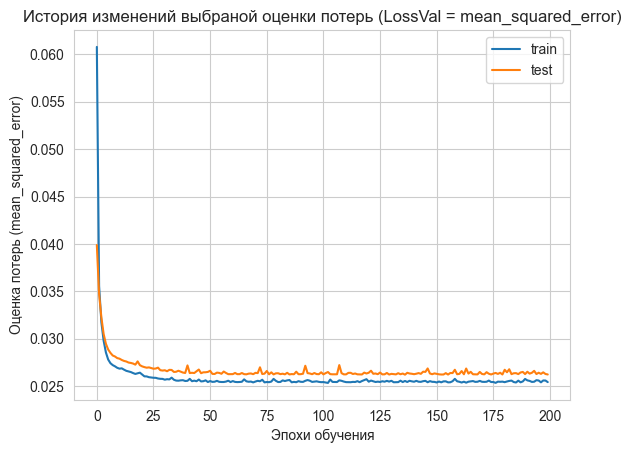

In [72]:
plt.plot(totalHistoryLossTrain, label='train')
if 'val_loss' in history.history.keys():
    plt.plot(totalHistoryLossTest, label='test')
plt.legend()
plt.title("История изменений выбраной оценки потерь (LossVal = mean_squared_error)")
plt.ylabel("Оценка потерь (mean_squared_error)")
plt.xlabel("Эпохи обучения")
###plt.ylim ( (0, 0.03) ) # область видимости для оси "Оценки потерь"

In [73]:
# Осмотрим последние значения выбранной оценки потерь (LossVal = mean_squared_error)
totalHistoryLossTrain[-5:]

[0.025582032278180122,
 0.02538970112800598,
 0.025586238130927086,
 0.02557949163019657,
 0.025412358343601227]

36/36 [==============================] - 0s 317us/step
MAE :     0.124 (средняя абсолютная ошибка)
MSE :  0.026219 (среднеквадратичная ошибка)
RMSE:  0.161923 (кв. корень из среднеквадратичной ошибки)
R2  :     0.359 (коэфф. детерминации)


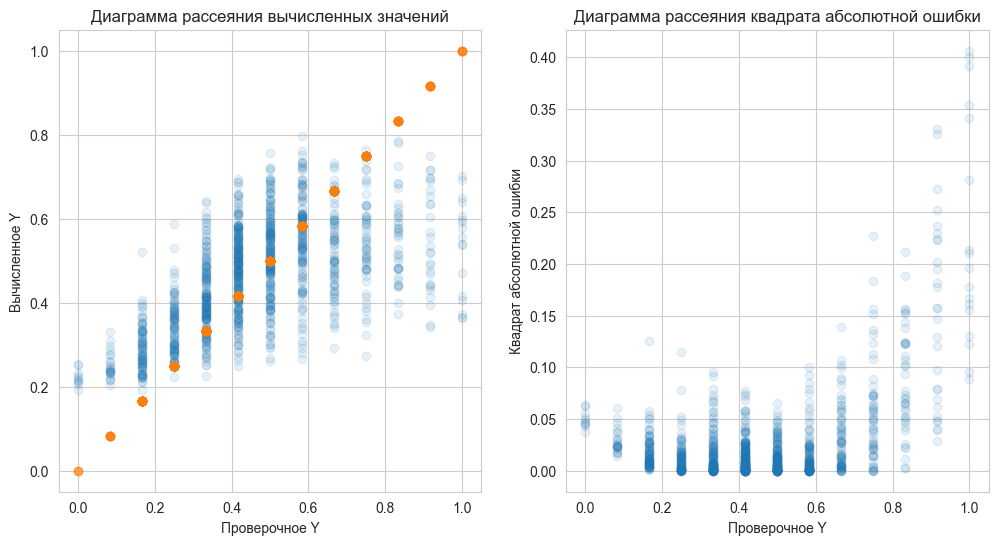

In [74]:
# create model
with tf.device('/CPU:0'):
    # Calculate predictions
    yNorm_pred = model.predict(xNorm_test[["shell_weight",
                                           "diameter"]])  # требуется передать таблицу с кол-ом столбцов равным кол-ву входных нейронов

GET_METRICS_SINGLE(yNorm_test, yNorm_pred)
PLOT34(yNorm_test, yNorm_pred)

## Получение весовых коэффициентов

In [75]:
# Осмотр весовых коэфф.
for layer in model.layers:
    print(f"\nИмя слоя:{layer.name};  Тип слоя: {layer} ------------------------------------")
    print(f"\nВесовые коэфф. w_i  ")
    print(layer.weights[0].numpy())
    print(f"\nВесовой коэфф. bias {layer.bias.numpy()}")


Имя слоя:dense_39;  Тип слоя: <keras.src.layers.core.dense.Dense object at 0x2968a1e50> ------------------------------------

Весовые коэфф. w_i  
[[0.46255988]
 [0.18163493]]

Весовой коэфф. bias [0.19051528]


## Построение 3D графика зависимости вычисленных значений Y_pred от объясняющих признаков x1 и x2

In [76]:
my3dplot(
    xNorm_train, yNorm_train, not True,
    xNorm_test, yNorm_test, True,
    yNorm_pred, True,
    "shell_weight", "diameter", *target)

## Нейронная сеть m2. Построение модели со скрытыми слоями от ДВУХ “x” (2->…->…->1)

In [77]:
with tf.device('/CPU:0'):
    totalHistoryLossTrain = []  # Вспомогательный список для хранение полной истории обучения
    totalHistoryLossTest = []  # Вспомогательный список для хранение полной истории обучения

    ###########################################
    #▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
    # 1) Параметры структуры
    input_size = 2  # кол-во входных  узлов
    output_size = 1  # кол-во выходных узлов
    ###hiddenLayer_size  = 10 # кол-во узлов на скрытом слое

    # 2.1) Построение модели нейронной сети
    # Многослойная
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Input(shape=(input_size,)))  # Входной слой
    # параметр "units" - кол-во узлов/нейронов на данном слое
    # параметр "activation" - вид функции активации

    model.add(tf.keras.layers.Dense(units=4, activation=tf.keras.activations.sigmoid))
    model.add(tf.keras.layers.Dense(units=8, activation=tf.keras.activations.sigmoid))

    model.add(tf.keras.layers.Dense(units=output_size,
                                    activation=tf.keras.activations.linear))  # Выходной слой, с линейной функцией активации

    # 2.2) Ф. потерь и оптимизации
    fLoss = tf.keras.losses.mean_squared_error
    #fOptimizer=tf.keras.optimizers.SGD(learning_rate=0.01)
    fOptimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.005)
    fMetric = [tf.keras.losses.mean_squared_error]

    model.compile(
        loss=fLoss,
        optimizer=fOptimizer,
        metrics=[fMetric]
    )

    print(model.summary())
    #▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲
    ###########################################

with tf.device('/CPU:0'):
    # 3) Цикл обучения/продолжения обучения сети
    # xNorm_train, xNorm_test, yNorm_train, yNorm_test
    history = model.fit(

        xNorm_train[["shell_weight", "diameter"]],
        # обучающие X  # требуется передать таблицу с кол-ом столбцов равным кол-ву входных нейронов
        yNorm_train,  # обучающие Y

        validation_data=(  # опционально: проверочные X и Y
            xNorm_test[["shell_weight", "diameter"]],
            # требуется передать таблицу с кол-ом столбцов равным кол-ву входных нейронов
            yNorm_test),

        epochs=epochForTrain,  # кол-во эпох обучения
        batch_size=100,  # кол-во образцов в каждой эпохе
        verbose=1,
    )

    totalHistoryLossTrain.extend(history.history['loss'])
    if 'val_loss' in history.history.keys():
        totalHistoryLossTest.extend(history.history['val_loss'])

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 4)                 12        
                                                                 
 dense_41 (Dense)            (None, 8)                 40        
                                                                 
 dense_42 (Dense)            (None, 1)                 9         
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/200
27/27 [==============================] - 0s 4ms/step - loss: 0.1891 - mean_squared_error: 0.1891 - val_loss: 0.0392 - val_mean_squared_error: 0.0392
Epoch 2/200
27/27 [==============================] - 0s 1ms/step - loss: 0.0437 - mean_squared_error: 0.0437 - val_

Text(0.5, 0, 'Эпохи обучения')

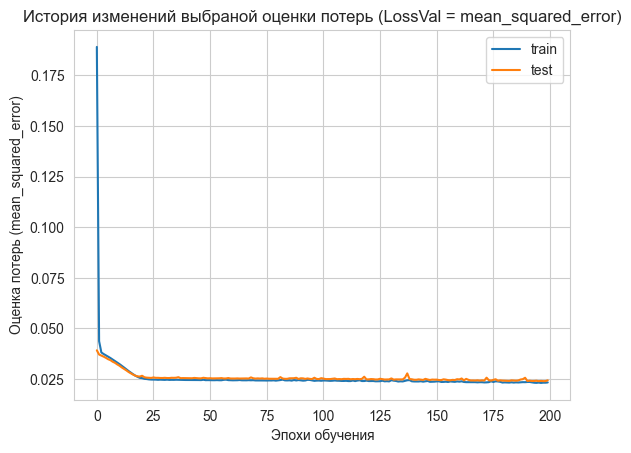

In [78]:
plt.plot(totalHistoryLossTrain, label='train')
if 'val_loss' in history.history.keys():
    plt.plot(totalHistoryLossTest, label='test')
plt.legend()
plt.title("История изменений выбраной оценки потерь (LossVal = mean_squared_error)")
plt.ylabel("Оценка потерь (mean_squared_error)")
plt.xlabel("Эпохи обучения")
###plt.ylim ( (0, 0.03) ) # область видимости для оси "Оценки потерь"

36/36 [==============================] - 0s 660us/step
MAE :     0.124 (средняя абсолютная ошибка)
MSE :  0.024381 (среднеквадратичная ошибка)
RMSE:  0.156143 (кв. корень из среднеквадратичной ошибки)
R2  :     0.404 (коэфф. детерминации)


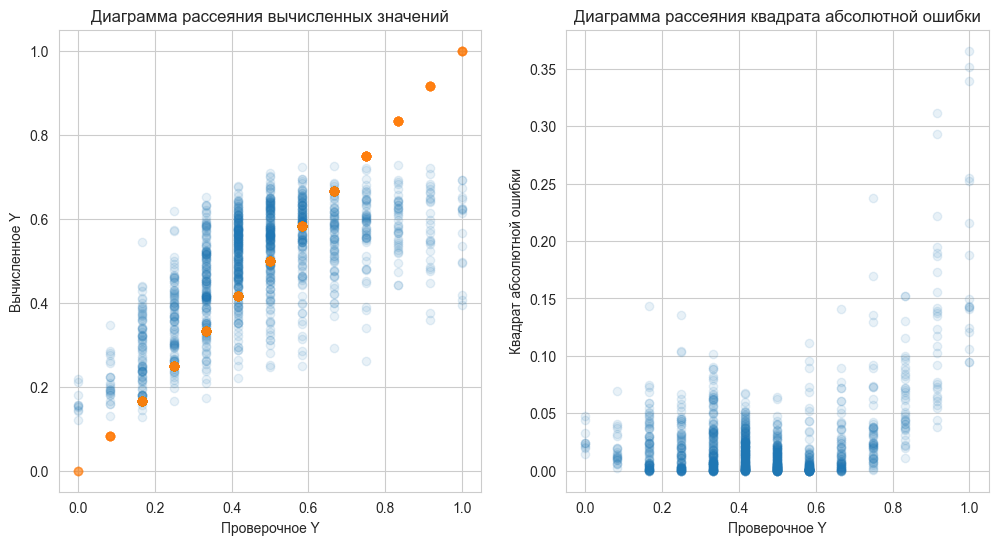

In [79]:
# create model
with tf.device('/CPU:0'):
    # Calculate predictions
    yNorm_pred = model.predict(xNorm_test[["shell_weight",
                                           "diameter"]])  # требуется передать таблицу с кол-ом столбцов равным кол-ву входных нейронов

GET_METRICS_SINGLE(yNorm_test, yNorm_pred)
PLOT34(yNorm_test, yNorm_pred)

In [80]:
# Осмотр весовых коэфф.
for layer in model.layers:
    print(f"\nИмя слоя:{layer.name};  Тип слоя: {layer} ------------------------------------")
    print(f"\nВесовые коэфф. w_i  ")
    print(layer.weights[0].numpy())
    print(f"\nВесовой коэфф. bias {layer.bias.numpy()}")


Имя слоя:dense_40;  Тип слоя: <keras.src.layers.core.dense.Dense object at 0x295b5e250> ------------------------------------

Весовые коэфф. w_i  
[[ 3.4805365   1.312279   -4.7353463  -1.219386  ]
 [ 0.19285907 -1.8727449  -1.856248    1.372797  ]]

Весовой коэфф. bias [-0.07305224  0.15280199 -0.17652464 -0.16169016]

Имя слоя:dense_41;  Тип слоя: <keras.src.layers.core.dense.Dense object at 0x295b5f050> ------------------------------------

Весовые коэфф. w_i  
[[ 0.59940785  0.32699123 -0.29283157 -0.8521232  -0.5225253   1.079765
   1.375548   -0.8650902 ]
 [ 0.02769614  0.6118713  -0.65677655 -0.7656429  -0.58766776  0.2275808
   0.58180666 -0.94569033]
 [-0.14705378 -0.21757534  0.6561192   1.0615519   0.01728558 -1.2409747
  -2.0527163   1.0077014 ]
 [-0.7928053   0.23989509 -0.32437897  0.6525052   0.06492264  0.0776649
  -0.7288583   0.37562954]]

Весовой коэфф. bias [ 0.06140013  0.04373816 -0.16607608 -0.09462078 -0.16337541  0.05835733
  0.04413494 -0.03658745]

Имя слоя:

In [81]:
xNorm_train

,shell_weight,diameter,sex_is_M,viscera_weight
2965,0.300000,0.576087,1.0,0.349462
3157,0.508197,0.782609,0.0,0.497849
2447,0.177869,0.423913,0.0,0.118280
726,0.509016,0.728261,0.0,0.348387
1164,0.427049,0.641304,1.0,0.377419
...,...,...,...,...
2181,0.020492,0.097826,0.0,0.023656
2409,0.599180,0.815217,1.0,0.624731
2033,0.401639,0.673913,1.0,0.451613
1364,0.078689,0.260870,0.0,0.090323


In [82]:
my3dplot(
    xNorm_train, yNorm_train, False,
    xNorm_test, yNorm_test, True,
    yNorm_pred, True,
    "shell_weight", "diameter", *target)

### Нейронная сеть m3. Построение модели без скрытых слоев от множества "x" (4->1)

In [83]:
with tf.device('/CPU:0'):
    totalHistoryLossTrain = []  # Вспомогательный список для хранение полной истории обучения
    totalHistoryLossTest = []  # Вспомогательный список для хранение полной истории обучения

    ###########################################
    #▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
    # 1) Параметры структуры
    input_size = 4  # кол-во входных  узлов
    output_size = 1  # кол-во выходных узлов
    ###hiddenLayer_size  = 10 # кол-во узлов на скрытом слое

    # 2.1) Построение модели нейронной сети
    # Многослойная
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Input(shape=(input_size,)))  # Входной слой
    # параметр "units" - кол-во узлов/нейронов на данном слое
    # параметр "activation" - вид функции активации
    #...
    model.add(tf.keras.layers.Dense(units=output_size,
                                    activation=tf.keras.activations.linear))  # Выходной слой, с линейной функцией активации

    # 2.2) Ф. потерь и оптимизации
    fLoss = tf.keras.losses.mean_squared_error
    #fOptimizer=tf.keras.optimizers.SGD(learning_rate=0.01)
    fOptimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.01)
    fMetric = [tf.keras.losses.mean_squared_error]

    model.compile(
        loss=fLoss,
        optimizer=fOptimizer,
        metrics=[fMetric]
    )

    print(model.summary())

with tf.device('/CPU:0'):
    # 3) Цикл обучения/продолжения обучения сети
    # xNorm_train, xNorm_test, yNorm_train, yNorm_test
    history = model.fit(

        xNorm_train[features],
        # обучающие X  # требуется передать таблицу с кол-ом столбцов равным кол-ву входных нейронов
        yNorm_train,  # обучающие Y

        validation_data=(  # опционально: проверочные X и Y
            xNorm_test[features],  # требуется передать таблицу с кол-ом столбцов равным кол-ву входных нейронов
            yNorm_test),

        epochs=epochForTrain,  # кол-во эпох обучения
        batch_size=100,  # кол-во образцов в каждой эпохе
        verbose=1,
    )

    totalHistoryLossTrain.extend(history.history['loss'])
    if 'val_loss' in history.history.keys():
        totalHistoryLossTest.extend(history.history['val_loss'])

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 1)                 5         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/200
27/27 [==============================] - 0s 3ms/step - loss: 0.7913 - mean_squared_error: 0.7913 - val_loss: 0.2950 - val_mean_squared_error: 0.2950
Epoch 2/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1481 - mean_squared_error: 0.1481 - val_loss: 0.0749 - val_mean_squared_error: 0.0749
Epoch 3/200
27/27 [==============================] - 0s 2ms/step - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.0602 - val_mean_squared_error: 0.0602
Epoch 4/200
27/27 [==============================] - 0s 1ms/s

Text(0.5, 0, 'Эпохи обучения')

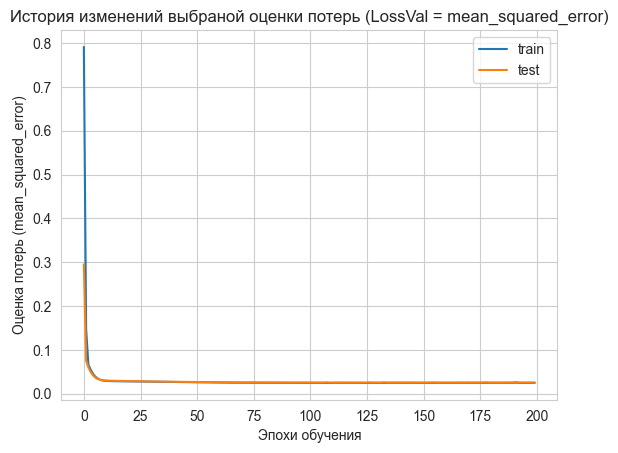

In [84]:
plt.plot(totalHistoryLossTrain, label='train')
if 'val_loss' in history.history.keys():
    plt.plot(totalHistoryLossTest, label='test')
plt.legend()
plt.title("История изменений выбраной оценки потерь (LossVal = mean_squared_error)")
plt.ylabel("Оценка потерь (mean_squared_error)")
plt.xlabel("Эпохи обучения")
###plt.ylim ( (0, 0.03) ) # область видимости для оси "Оценки потерь"

36/36 [==============================] - 0s 789us/step
MAE :     0.121 (средняя абсолютная ошибка)
MSE :  0.025535 (среднеквадратичная ошибка)
RMSE:  0.159797 (кв. корень из среднеквадратичной ошибки)
R2  :     0.375 (коэфф. детерминации)


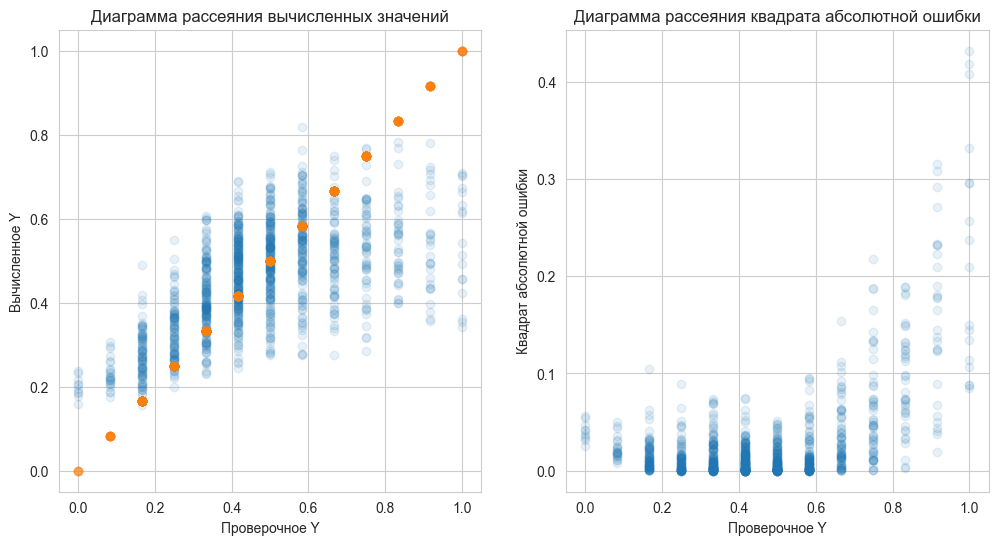

In [85]:
# create model
with tf.device('/CPU:0'):
    # Calculate predictions
    yNorm_pred = model.predict(
        xNorm_test[features])  # требуется передать таблицу с кол-ом столбцов равным кол-ву входных нейронов

GET_METRICS_SINGLE(yNorm_test, yNorm_pred)
PLOT34(yNorm_test, yNorm_pred)

In [86]:
# Осмотр весовых коэфф.
for layer in model.layers:
    print(f"\nИмя слоя:{layer.name};  Тип слоя: {layer} ------------------------------------")
    print(f"\nВесовые коэфф. w_i  ")
    print(layer.weights[0].numpy())
    print(f"\nВесовой коэфф. bias {layer.bias.numpy()}")


Имя слоя:dense_43;  Тип слоя: <keras.src.layers.core.dense.Dense object at 0x293c77050> ------------------------------------

Весовые коэфф. w_i  
[[ 0.62897   ]
 [ 0.29166365]
 [ 0.03023398]
 [-0.3026547 ]]

Весовой коэфф. bias [0.15472195]


### Нейронная сеть m4. Построение модели со скрытыми слоями от множества "x"  (пример: 5->...->...->1)

In [13]:
epochForTrain = 400

In [15]:
with tf.device('/CPU:0'):
    totalHistoryLossTrain = []  # Вспомогательный список для хранение полной истории обучения
    totalHistoryLossTest = []  # Вспомогательный список для хранение полной истории обучения

    ###########################################
    #▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
    # 1) Параметры структуры
    input_size = 4  # кол-во входных  узлов
    output_size = 1  # кол-во выходных узлов
    ###hiddenLayer_size  = 10 # кол-во узлов на скрытом слое

    # 2.1) Построение модели нейронной сети
    # Многослойная
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Input(shape=(input_size,)))  # Входной слой

    model.add(tf.keras.layers.Dense(units=4, activation=tf.keras.activations.sigmoid))
    model.add(tf.keras.layers.Dense(units=8, activation=tf.keras.activations.sigmoid))
    # параметр "units" - кол-во узлов/нейронов на данном слое
    # параметр "activation" - вид функции активации
    #...
    model.add(tf.keras.layers.Dense(units=output_size,
                                    activation=tf.keras.activations.linear))  # Выходной слой, с линейной функцией активации

    # 2.2) Ф. потерь и оптимизации
    fLoss = tf.keras.losses.mean_squared_error
    #fOptimizer=tf.keras.optimizers.SGD(learning_rate=0.01)
    fOptimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.01)
    fMetric = [tf.keras.losses.mean_squared_error]

    model.compile(
        loss=fLoss,
        optimizer=fOptimizer,
        metrics=[fMetric]
    )

    print(model.summary())
    #▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲
    ###########################################

with tf.device('/CPU:0'):
    # 3) Цикл обучения/продолжения обучения сети
    # xNorm_train, xNorm_test, yNorm_train, yNorm_test
    history = model.fit(

        xNorm_train[features],
        # обучающие X  # требуется передать таблицу с кол-ом столбцов равным кол-ву входных нейронов
        yNorm_train,  # обучающие Y

        validation_data=(  # опционально: проверочные X и Y
            xNorm_test[features],  # требуется передать таблицу с кол-ом столбцов равным кол-ву входных нейронов
            yNorm_test),

        epochs=epochForTrain,  # кол-во эпох обучения
        batch_size=400,  # кол-во образцов в каждой эпохе
        verbose=1,
    )

    totalHistoryLossTrain.extend(history.history['loss'])
    if 'val_loss' in history.history.keys():
        totalHistoryLossTest.extend(history.history['val_loss'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 8)                 40        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 69 (276.00 Byte)
Trainable params: 69 (276.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/400
7/7 [==============================] - 0s 12ms/step - loss: 0.9284 - mean_squared_error: 0.9284 - val_loss: 0.3963 - val_mean_squared_error: 0.3963
Epoch 2/400
7/7 [==============================] - 0s 2ms/step - loss: 0.2263 - mean_squared_error: 0.2263 - val_loss

Text(0.5, 0, 'Эпохи обучения')

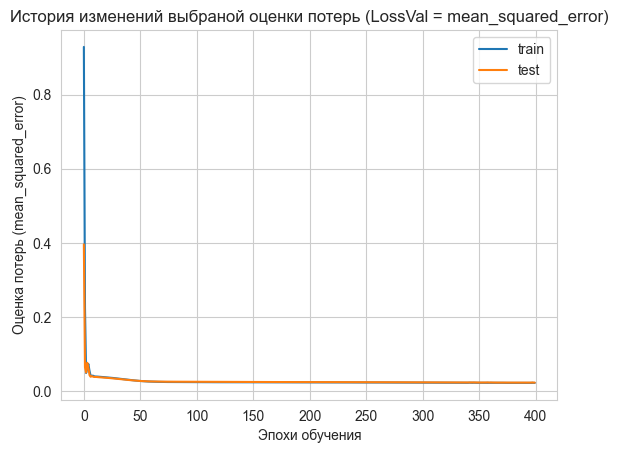

In [16]:
plt.plot(totalHistoryLossTrain, label='train')
if 'val_loss' in history.history.keys():
    plt.plot(totalHistoryLossTest, label='test')
plt.legend()
plt.title("История изменений выбраной оценки потерь (LossVal = mean_squared_error)")
plt.ylabel("Оценка потерь (mean_squared_error)")
plt.xlabel("Эпохи обучения")
###plt.ylim ( (0, 0.03) ) # область видимости для оси "Оценки потерь"

36/36 [==============================] - 0s 320us/step
MAE :     0.120 (средняя абсолютная ошибка)
MSE :  0.023729 (среднеквадратичная ошибка)
RMSE:  0.154043 (кв. корень из среднеквадратичной ошибки)
R2  :     0.420 (коэфф. детерминации)


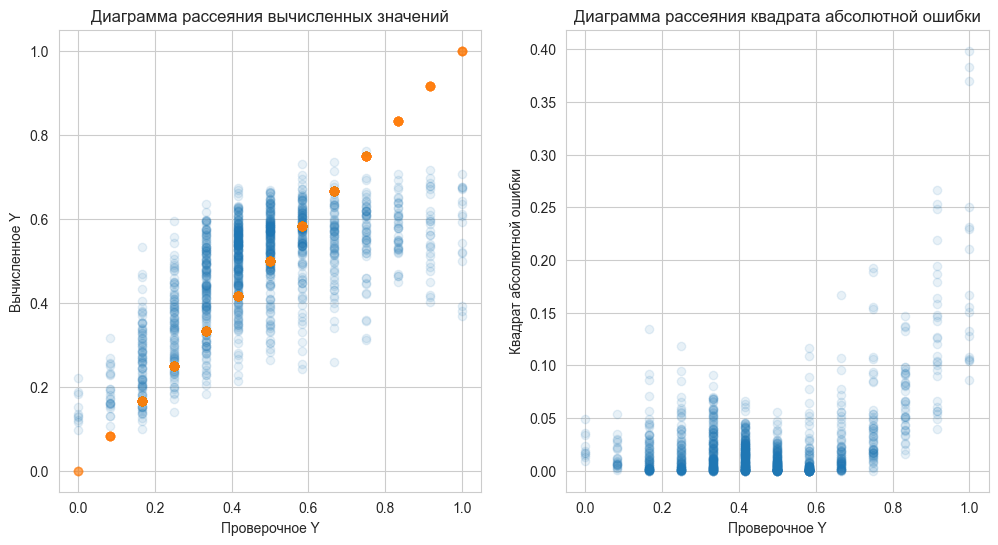

In [17]:
# create model
with tf.device('/CPU:0'):
    # Calculate predictions
    yNorm_pred = model.predict(
        xNorm_test[features])  # требуется передать таблицу с кол-ом столбцов равным кол-ву входных нейронов

GET_METRICS_SINGLE(yNorm_test, yNorm_pred)
PLOT34(yNorm_test, yNorm_pred)

In [90]:
# Осмотр весовых коэфф.
for layer in model.layers:
    print(f"\nИмя слоя:{layer.name};  Тип слоя: {layer} ------------------------------------")
    print(f"\nВесовые коэфф. w_i  ")
    print(layer.weights[0].numpy())
    print(f"\nВесовой коэфф. bias {layer.bias.numpy()}")


Имя слоя:dense_44;  Тип слоя: <keras.src.layers.core.dense.Dense object at 0x296af7190> ------------------------------------

Весовые коэфф. w_i  
[[ 2.6648247  -2.6762962   3.575814   -5.228027  ]
 [-1.8960457   0.94963366 -1.0193874  -1.3734145 ]
 [ 0.29411462  0.22769848 -0.19587637 -0.45123217]
 [-1.747087    0.41683117 -0.0335967  -1.8001617 ]]

Весовой коэфф. bias [-0.27698398 -0.47422633 -0.36360335  0.08190135]

Имя слоя:dense_45;  Тип слоя: <keras.src.layers.core.dense.Dense object at 0x295590150> ------------------------------------

Весовые коэфф. w_i  
[[ 0.33373523 -0.17889269  1.1331353   0.8979367   1.2690935  -0.10816498
  -1.701523   -0.06032069]
 [-0.30812767  0.29945293 -0.08386997 -0.82366985 -0.7952576  -0.38195845
   0.63154924 -0.68292683]
 [-0.5448716  -0.6096502   0.63533336  0.12353817  0.85737914 -0.5694456
  -1.6382604  -0.24655731]
 [-1.2722557   0.41708255 -1.8733014  -1.599486   -1.7263762  -0.70266765
   1.5463101  -1.8805188 ]]

Весовой коэфф. bias [-0

In [18]:
ddf = pd.DataFrame(
    [
        ["x1", "2->1", 200, 0.359, 0.1619],
        ["x1,x2", "2->...->...->1", 200, 0.404, 0.1561],
        ["Все", "4->1", 200, 0.375, 0.1597],
        ["Все", "4->...->...->1", 200, 0.425, 0.1559],
    ],
    columns=["Признаки", "Структура", "ЭпохОбучения", "R2", "RMSE"],
)
ddf

,Признаки,Структура,ЭпохОбучения,R2,RMSE
0,x1,2->1,200,0.359,0.1619
1,"x1,x2",2->...->...->1,200,0.404,0.1561
2,Все,4->1,200,0.375,0.1597
3,Все,4->...->...->1,200,0.425,0.1559


## Выводы по работе

- Т.к. данные имеют нелинейную структуру, архитектуры без скрытых слоёв показали такую-же точность, как и линейная регрессия и SGDregressor.
- 200 эпох для таких входных данных было достаточно для достижения приемлемого значения ошибки
- Использование скрытых слоёв заметно увеличило значение R2 что говорит о повышении точности модели